In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from  sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

terror=pd.read_csv('G:\math_modeling\data\gtd.csv')
# print(list(terror.columns))
# 选去聚类特征 14个
# terror=terror[['nkill','nkillter','nwound','nwoundte','propextent',
#                'propvalue','nhostkid','ransomamt','ransompaid',
#                'hostkidoutcome','nreleased','weaptype1','targtype1',
#                'nperps']]

terror=terror[['nkill','nkillter','nwound','nwoundte','propextent',
               'weaptype1','targtype1','nperps']]
# 类别特征处理
terror=pd.get_dummies(terror,columns=['weaptype1','targtype1'])
# print(terror.isnull().sum())
terror.head()

G:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (7,62,63,64,80,95,97,115,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,nkill,nkillter,nwound,nwoundte,propextent,nperps,weaptype1_1,weaptype1_2,weaptype1_3,weaptype1_5,...,targtype1_13,targtype1_14,targtype1_15,targtype1_16,targtype1_17,targtype1_18,targtype1_19,targtype1_20,targtype1_21,targtype1_22
0,104.0,100.0,6.0,NaN,NaN,100.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,3.0,0.0,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1.0,0.0,0.0,0.0,NaN,NaN,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,3.0,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,1.0,0.0,NaN,NaN,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [118]:
# 缺失值处理
terror=terror.fillna(0)

clf.fit(X_scaled)
# 训练kmeans
clf = KMeans(n_clusters=5,init='k-means++')  #给定类别个数为3
clf.fit(terror)
#center为各类的聚类中心，
centers = clf.cluster_centers_
#标注每个点的聚类结果
labels = clf.labels_
inertia=clf.inertia_
print(inertia)

86981747.87536582


In [119]:
# 每个类别对应的数量
r1 = pd.Series(labels).value_counts()
print(r1)

1    81255
0    32745
3      174
4        6
2        3
dtype: int64


In [120]:
terror['cluster']=labels
terror.sort_values('cluster')
terror.head()

,nkill,nkillter,nwound,nwoundte,propextent,nperps,weaptype1_1,weaptype1_2,weaptype1_3,weaptype1_5,...,targtype1_14,targtype1_15,targtype1_16,targtype1_17,targtype1_18,targtype1_19,targtype1_20,targtype1_21,targtype1_22,cluster
0,104.0,100.0,6.0,0.0,0.0,100.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,3.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,3.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [121]:
# 寻找中心值
from pandas.tools.plotting import scatter_matrix
terror.groupby('cluster').mean()

,nkill,nkillter,nwound,nwoundte,propextent,nperps,weaptype1_1,weaptype1_2,weaptype1_3,weaptype1_5,...,targtype1_13,targtype1_14,targtype1_15,targtype1_16,targtype1_17,targtype1_18,targtype1_19,targtype1_20,targtype1_21,targtype1_22
cluster,,,,,,,,,,,,,,,,,,,,,
0,3.481325,0.634631,5.471156,0.094549,1.342648,5.765460,0.000550,0.003268,0.000336,0.365063,...,0.001099,0.237074,0.039243,0.006322,0.013559,0.003573,0.034265,0.031272,0.013284,0.009253
1,1.966734,0.420097,2.473288,0.103637,1.337222,-99.000000,0.000111,0.001514,0.000000,0.261744,...,0.001046,0.288684,0.023186,0.004652,0.022829,0.000898,0.026361,0.049843,0.023740,0.010461
2,997.000000,3.666667,6793.666667,0.000000,1.333333,3.333333,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,15.454023,7.781609,5.775862,1.775862,1.695402,499.160920,0.000000,0.000000,0.000000,0.534483,...,0.000000,0.310345,0.011494,0.000000,0.011494,0.000000,0.005747,0.000000,0.000000,0.040230
4,10.333333,0.000000,10.000000,0.000000,1.333333,3700.000000,0.000000,0.000000,0.000000,0.166667,...,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


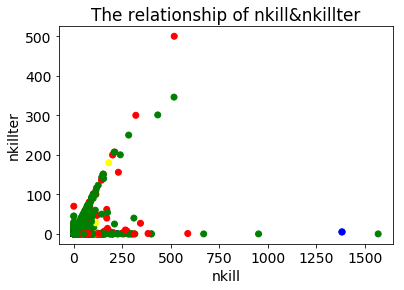

In [122]:
# 把中心点拿出来，准备画图
centers = terror.groupby("cluster").mean().reset_index()
plt.rcParams['font.size'] = 14
colors = np.array(['red', 'green', 'blue','yellow','purple'])
#这里先挑选两2中数据，进行画图
#先绘制数据点,让颜色（红，绿，蓝）与cluster1中的（0类，1类，2类）对应起来
plt.scatter(terror["nkill"], terror["nkillter"], c=colors[terror["cluster"]])
#再绘制数据点中的中心点位置
# plt.scatter(centers.nkill, centers.nkillter, linewidths=3, marker='+', s=300, c='black')
plt.xlabel("nkill")
plt.ylabel("nkillter")
plt.title("The relationship of nkill&nkillter")
plt.show()

In [124]:
# # 查看8个特征之间的相互关系
# # 先看簇1
# scatter_matrix(terror[['nkill','nkillter','nwound','nwoundte','propextent',
#                        'weaptype1','targtype1','nperps']], s=100, alpha=1, c=colors[terror["cluster"]], figsize=(10, 10))
# plt.suptitle("with 5 centroids initialized")
# plt.show()